# Purpose :  Predict housing price based in Boston based on data 


# Process  : 


# Model :  
  ## 1. Linear Regressions 
  ## 2. KNN
  ## 3. SVM
  ## 4 .Decision tree

In [1]:
from sklearn.datasets import load_boston
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.datasets import load_boston
import pylab as pl
import matplotlib.pyplot as plt



from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df['target']

#  Relative feature importances

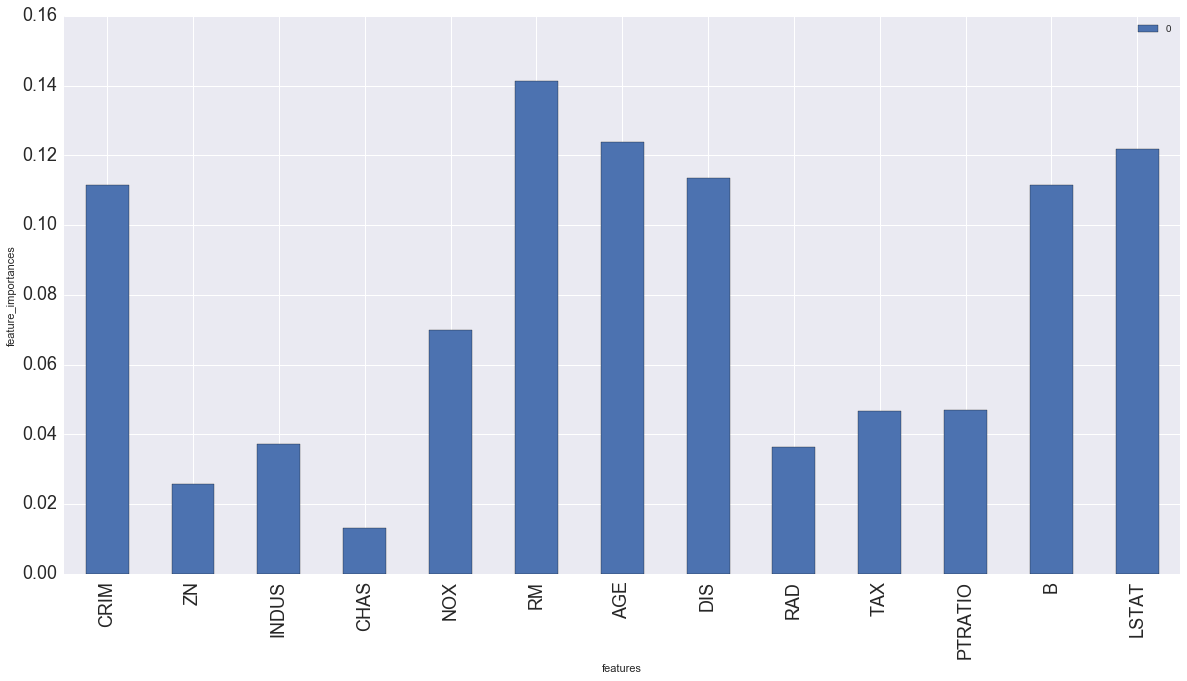

In [5]:
#  relative feature importances



X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

Y = np.array(Y).astype(int)



clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_ 

df_feature = pd.DataFrame(clf.feature_importances_ )
df_feature.index =[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
pd.DataFrame(df_feature).plot(kind='bar',figsize=(20, 10),fontsize=18) 
pyplot.xlabel('features')
pyplot.ylabel('feature_importances')

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


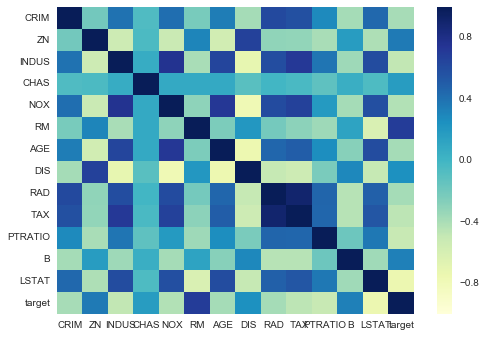

In [7]:
ax = sns.heatmap(df.corr(), cmap="YlGnBu")

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


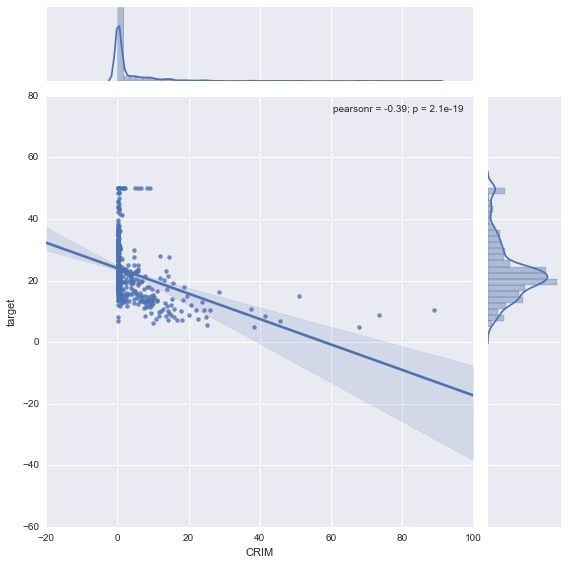

In [9]:
sns.jointplot(df['CRIM'], df['target'],  kind="reg", size=8)


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


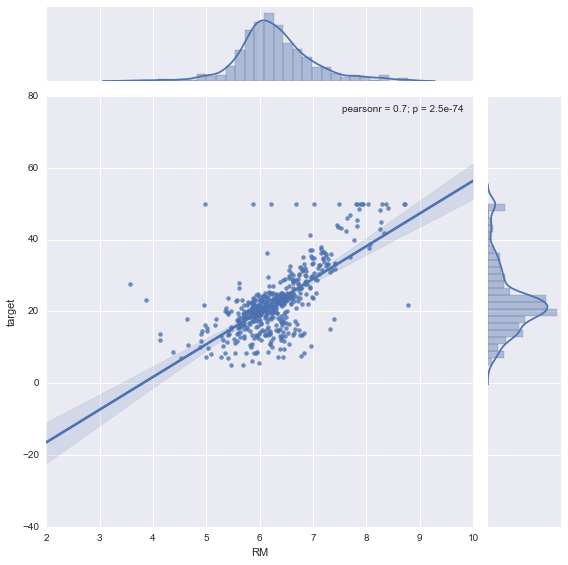

In [10]:
sns.jointplot(df['RM'], df['target'],  kind="reg", size=8)

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


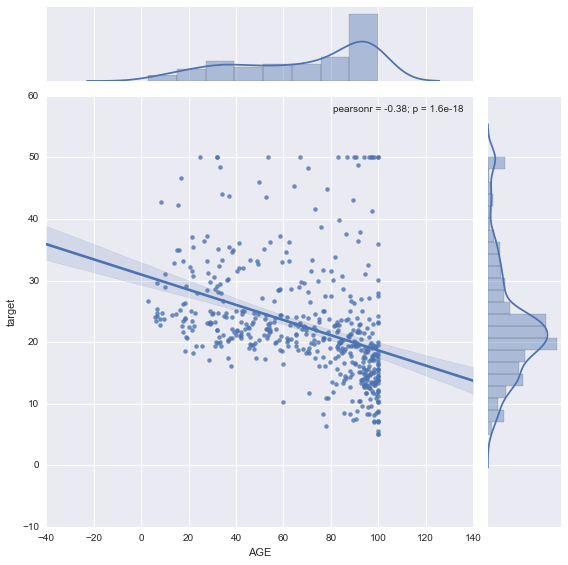

In [11]:
sns.jointplot(df['AGE'], df['target'],  kind="reg", size=8)

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


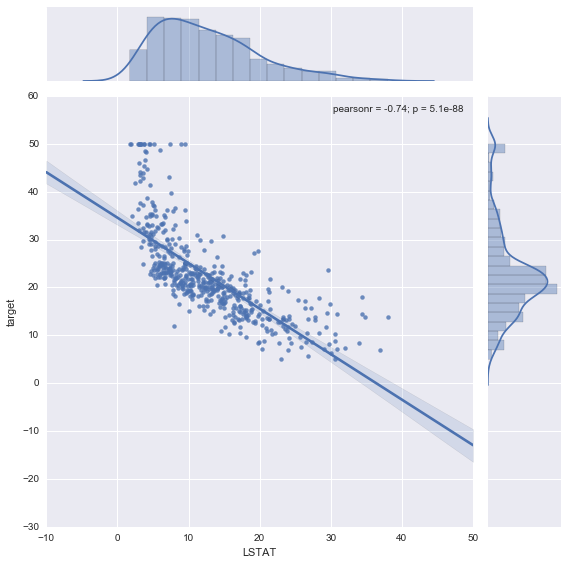

In [12]:
sns.jointplot(df['LSTAT'], df['target'],  kind="reg", size=8)

# Linear Regressions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c69bd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112846400>]], dtype=object)

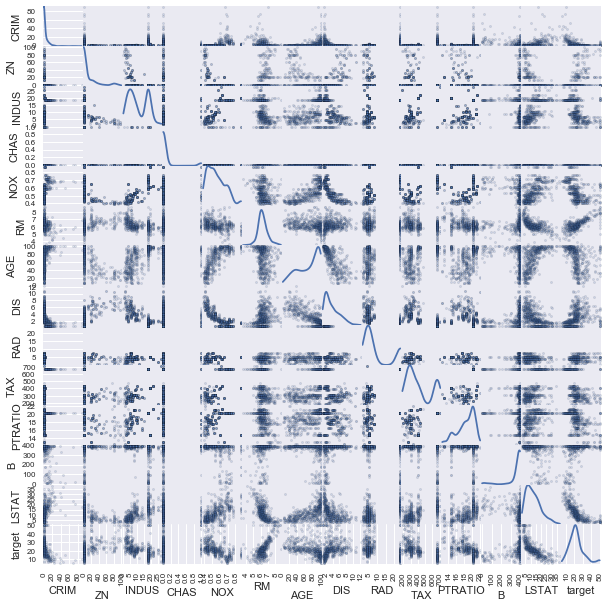

In [15]:
pd.scatter_matrix(df, figsize=[10, 10], alpha=0.2, diagonal='kde')

     actual      error    predict
0      24.0  -6.008213  30.008213
1      21.6  -3.429861  25.029861
2      34.7   4.129768  30.570232
3      33.4   4.791859  28.608141
4      36.2   8.257118  27.942882
5      28.7   3.440600  25.259400
6      22.9  -0.104340  23.004340
7      27.1   7.565244  19.534756
8      16.5   4.983035  11.516965
9      18.9  -0.019815  18.919815
10     15.0  -3.995827  18.995827
11     18.9  -2.689709  21.589709
12     21.7   0.794651  20.905349
13     20.4   0.844641  19.555359
14     18.2  -1.083796  19.283796
15     19.9   0.599998  19.300002
16     23.1   2.571100  20.528900
17     17.5   0.590325  16.909675
18     20.2   4.029326  16.170674
19     18.2  -0.207816  18.407816
20     13.6   1.079595  12.520405
21     19.6   1.928954  17.671046
22     15.2  -0.629349  15.829349
23     14.5   0.696317  13.803683
24     15.6  -0.077081  15.677081
25     13.9   0.520836  13.379164
26     16.6   1.137412  15.462588
27     14.8   0.101364  14.698636
28     18.4  -

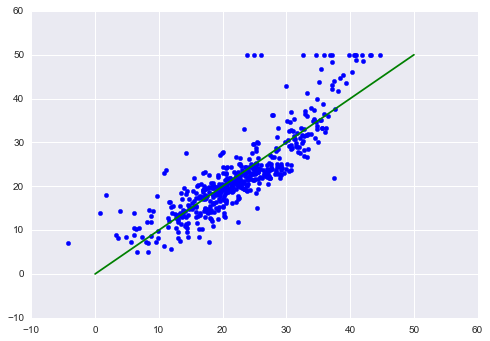

In [41]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df['target']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print (pd.DataFrame({'predict':regr.predict(X), 'actual':Y, 'error':Y-regr.predict(X)}))



print ('score :', regr.score(X,Y))
print ('intercept_ : ' , regr.fit(X, Y).intercept_, '\n', 'coef_ : ', regr.fit(X, Y).coef_)


# Plot outputs
plt.scatter(regr.predict(X), Y,  color='blue')
plt.plot([0,50],[0,50], 'g-')


plt.show()

score : 0.777566120324
intercept_ :  32.2611068753 
 coef_ :  [ -1.05574295e-01   3.52748549e-02  -4.35179251e-02   4.55405227e-01
  -1.24268073e+01   3.75411229e+00  -2.36116881e-02  -1.21088069e+00
   2.50740082e-01  -1.37702943e-02  -8.38888137e-01   7.93577159e-03
  -3.50952134e-01]


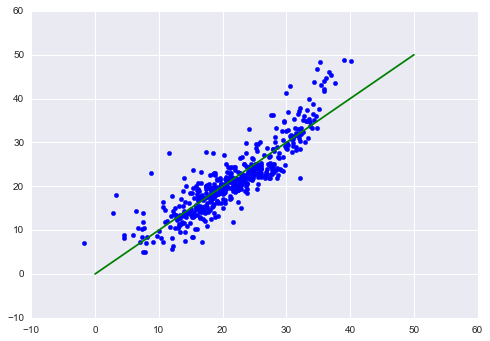

In [40]:
# remove possible outliers 

df_ = df[df.target < 50]

X = df_[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df_['target']

regr = linear_model.LinearRegression()
regr.fit(X, Y)


# Plot outputs
plt.scatter(regr.predict(X), Y,  color='blue')
plt.plot([0,50],[0,50], 'g-')



print ('score :', regr.score(X,Y))
print ('intercept_ : ' , regr.fit(X, Y).intercept_, '\n', 'coef_ : ', regr.fit(X, Y).coef_)

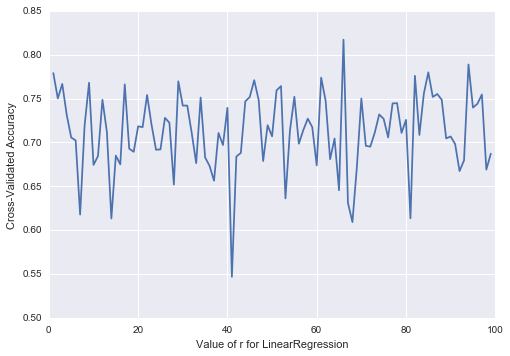

In [29]:
# cross_validation


X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df['target']
r_scores = []
random_state=range(1,100)
for r in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=r)

    regr.fit(X_train,  y_train)
    r_scores.append(regr.score(X_test,y_test))
    

plt.plot(random_state, r_scores)
plt.xlabel('Value of r for LinearRegression')
plt.ylabel('Cross-Validated Accuracy')



In [33]:
# http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html
# import statsmodels.api as sm
# ref : http://marcharper.codes/2016-06-14/Linear+Regression+with+Statsmodels+and+Scikit-Learn.html

# import statsmodels.api as sm

import statsmodels.api as sm



model = sm.OLS(Y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Tue, 23 Aug 2016   Prob (F-statistic):               0.00
Time:                        16:53:56   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.0